In [1]:
import matplotlib.pyplot as plt
import numpy as np
from custom_sepsis import *

In [ ]:
dqns = []
for i in range(100):
    dqns.append(train_dqn(true_env, 100000, f"1e5-{i}"))

In [2]:
dqns = [Training.load(f"json/dqn/DQN-1e5-{i}_object.pkl") for i in range(50)]

In [ ]:
rewards = [[np.sum(episode.rewards) for episode in dqn.episodes] for dqn in dqns]

In [31]:
# Transpose the rewards to group values at the same index across all dqns
min_length = min(len(r) for r in rewards)  # Find the longest sequence
mean_rewards = []
std_rewards = []

for i in range(min_length):
    # Collect all rewards at index i, ignoring missing values
    values_at_i = [r[i] for r in rewards]
    mean_rewards.append(float(np.mean(values_at_i)))
    std_rewards.append(float(np.std(values_at_i)))

print(mean_rewards)
print(std_rewards)


[-0.800000011920929, -0.6000000238418579, -0.7400000095367432, -0.7599999904632568, -0.7200000286102295, -0.6600000262260437, -0.6600000262260437, -0.7200000286102295, -0.5799999833106995, -0.699999988079071, -0.6600000262260437, -0.6200000047683716, -0.6800000071525574, -0.7400000095367432, -0.6000000238418579, -0.8199999928474426, -0.6600000262260437, -0.699999988079071, -0.47999998927116394, -0.6000000238418579, -0.6200000047683716, -0.7200000286102295, -0.6800000071525574, -0.699999988079071, -0.6000000238418579, -0.6600000262260437, -0.7400000095367432, -0.7200000286102295, -0.7799999713897705, -0.6399999856948853, -0.6399999856948853, -0.5199999809265137, -0.6600000262260437, -0.7400000095367432, -0.6600000262260437, -0.7799999713897705, -0.6600000262260437, -0.6399999856948853, -0.5600000023841858, -0.7599999904632568, -0.5799999833106995, -0.7400000095367432, -0.6600000262260437, -0.7200000286102295, -0.5600000023841858, -0.6800000071525574, -0.6200000047683716, -0.759999990463

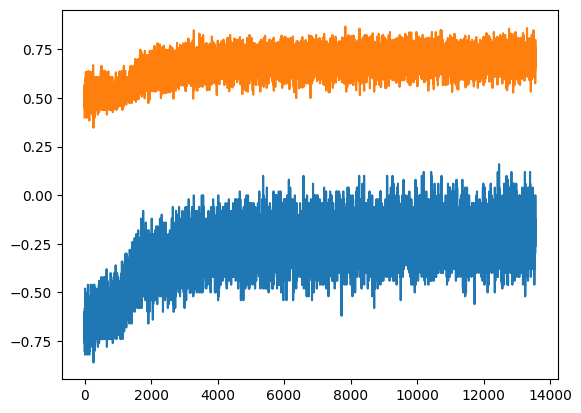

In [32]:
plt.plot(mean_rewards)
plt.plot(std_rewards)

In [33]:
import json

directory = "json/dqn/"
os.makedirs(directory, exist_ok=True)
object_path = os.path.join(
    directory, "DQN-mean-rewards.json"
)

with open(object_path, 'w') as file:
    description = str(f"Mean rewards for DQN over 50 runs with {str(len(mean_rewards))} episode interactions")
    json_file = {
        "name": "DQN",
        "info": {"description": description},
        "mean_rewards": mean_rewards,
        "std_rewards": std_rewards,
    }
    json.dump(json_file, file)

